<h1 style="color:white; font-weight:bold;">E-Commerce Customer Churn Prediction</h1>

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.decomposition import PCA

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc

In [2]:
df = pd.read_csv("Dataset/Cleaned_Data.csv")

In [3]:
# Define features and target variable
X = df.drop('Churn', axis=1)
y = df['Churn']

In [4]:
# Categorical and Numerical columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns
numerical_cols = X.select_dtypes(include=['int', 'float']).columns

# Define preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

In [5]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocess the data
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [6]:
# Standarize the data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [7]:
# Logistic Regression Model
model_lr = LogisticRegression(random_state=42)

# Train the model
model_lr.fit(X_train, y_train)

# Make predictions
y_pred = model_lr.predict(X_test)

In [8]:
print('Classification Report')
print("-----------------------")
print()
print(classification_report(y_test, y_pred))
print()

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=True)  
recall = recall_score(y_test, y_pred, pos_label=True)        
f1 = f1_score(y_test, y_pred, pos_label=True)                
roc_auc = roc_auc_score(y_test, model_lr.predict_proba(X_test)[:, 1])

print('Logistic Regression')
print("---------------------")
print(f'Accuracy:   {accuracy: .4f}')
print(f'Precision:   {precision:.4f}')
print(f'Recall:      {recall:.4f}')
print(f'F1 Score:    {f1:.4f}')
print(f'ROC AUC:     {roc_auc:.4f}')

Classification Report
-----------------------

              precision    recall  f1-score   support

       False       0.90      0.98      0.94       941
        True       0.79      0.46      0.59       185

    accuracy                           0.89      1126
   macro avg       0.85      0.72      0.76      1126
weighted avg       0.88      0.89      0.88      1126


Logistic Regression
---------------------
Accuracy:    0.8917
Precision:   0.7890
Recall:      0.4649
F1 Score:    0.5850
ROC AUC:     0.8808


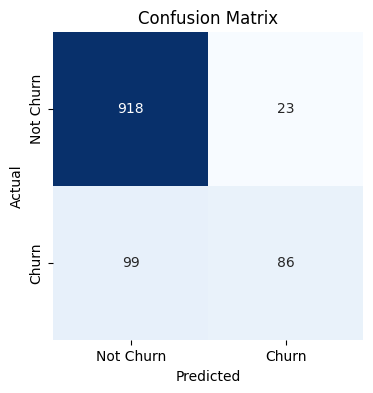

In [20]:
# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Not Churn', 'Churn'], 
            yticklabels=['Not Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

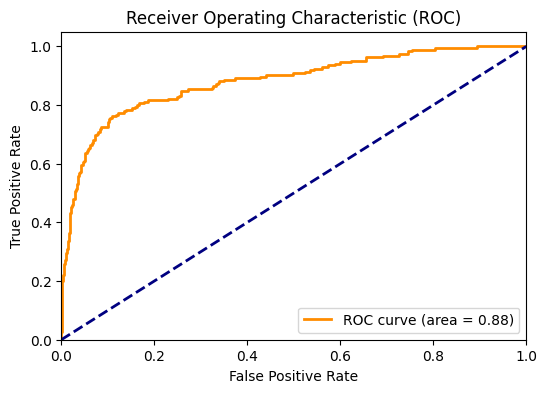

In [21]:
# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, model_lr.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

In [22]:
# Decision Tree Model
model_dt = DecisionTreeClassifier(random_state=42)

# Train the model
model_dt.fit(X_train, y_train)

# Make predictions
y_pred = model_dt.predict(X_test)

In [23]:
# Print classification report
print('Classification Report')
print("-----------------------")
print()
print(classification_report(y_test, y_pred))
print()

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=True)
recall = recall_score(y_test, y_pred, pos_label=True)
f1 = f1_score(y_test, y_pred, pos_label=True)
roc_auc = roc_auc_score(y_test, model_dt.predict_proba(X_test)[:, 1])

print('Decision Tree')
print("---------------------")
print(f'Accuracy:   {accuracy: .4f}')
print(f'Precision:   {precision:.4f}')
print(f'Recall:      {recall:.4f}')
print(f'F1 Score:    {f1:.4f}')
print(f'ROC AUC:     {roc_auc:.4f}')

Classification Report
-----------------------

              precision    recall  f1-score   support

       False       0.98      0.98      0.98       941
        True       0.88      0.90      0.89       185

    accuracy                           0.96      1126
   macro avg       0.93      0.94      0.93      1126
weighted avg       0.96      0.96      0.96      1126


Decision Tree
---------------------
Accuracy:    0.9627
Precision:   0.8783
Recall:      0.8973
F1 Score:    0.8877
ROC AUC:     0.9364


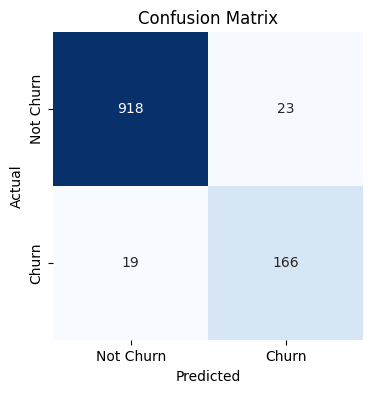

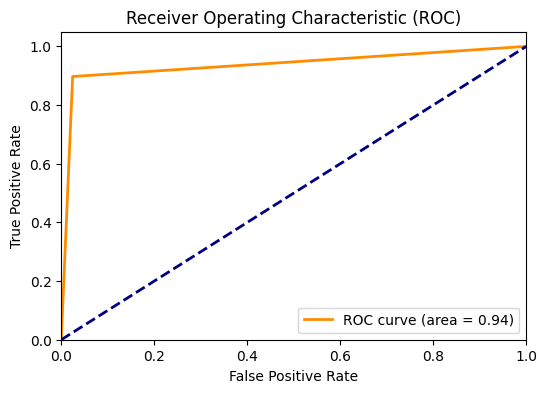

In [24]:
# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Not Churn', 'Churn'], 
            yticklabels=['Not Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print()
print()

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, model_dt.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

In [25]:
# Random Forest Model
model_rf = RandomForestClassifier(random_state=42)

# Train the model
model_rf.fit(X_train, y_train)

# Make predictions
y_pred = model_rf.predict(X_test)

In [26]:
print('Classification Report')
print("-----------------------")
print()
print(classification_report(y_test, y_pred))
print()

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=True)  
recall = recall_score(y_test, y_pred, pos_label=True)        
f1 = f1_score(y_test, y_pred, pos_label=True)                
roc_auc = roc_auc_score(y_test, model_rf.predict_proba(X_test)[:, 1])

print('Random Forest')
print("---------------------")
print(f'Accuracy:   {accuracy: .4f}')
print(f'Precision:   {precision:.4f}')
print(f'Recall:      {recall:.4f}')
print(f'F1 Score:    {f1:.4f}')
print(f'ROC AUC:     {roc_auc:.4f}')

Classification Report
-----------------------

              precision    recall  f1-score   support

       False       0.97      1.00      0.98       941
        True       0.98      0.83      0.90       185

    accuracy                           0.97      1126
   macro avg       0.97      0.91      0.94      1126
weighted avg       0.97      0.97      0.97      1126


Random Forest
---------------------
Accuracy:    0.9689
Precision:   0.9808
Recall:      0.8270
F1 Score:    0.8974
ROC AUC:     0.9869


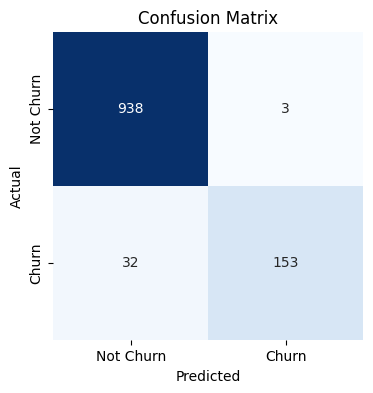

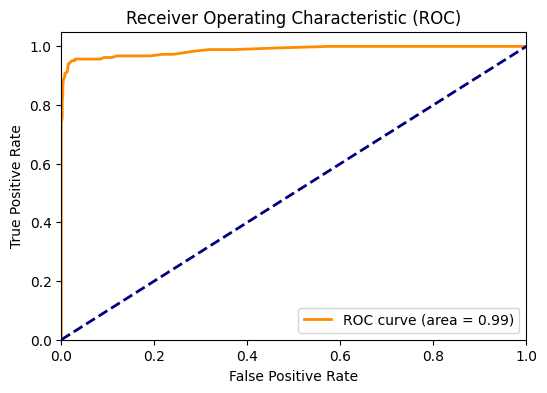

In [27]:
# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Not Churn', 'Churn'], 
            yticklabels=['Not Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print()
print()

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, model_rf.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

In [28]:
# XGBoost model
model_xgb = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Train the model
model_xgb.fit(X_train, y_train)

# Make predictions
y_pred = model_xgb.predict(X_test)

In [29]:
print('Classification Report')
print("-----------------------")
print()
print(classification_report(y_test, y_pred))
print()

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=True)
recall = recall_score(y_test, y_pred, pos_label=True)
f1 = f1_score(y_test, y_pred, pos_label=True)
roc_auc = roc_auc_score(y_test, model_xgb.predict_proba(X_test)[:, 1])


print('XGBoost')
print("---------------------")
print(f'Accuracy:   {accuracy: .4f}')
print(f'Precision:   {precision:.4f}')
print(f'Recall:      {recall:.4f}')
print(f'F1 Score:    {f1:.4f}')
print(f'ROC AUC:     {roc_auc:.4f}')


Classification Report
-----------------------

              precision    recall  f1-score   support

       False       0.98      1.00      0.99       941
        True       0.98      0.89      0.93       185

    accuracy                           0.98      1126
   macro avg       0.98      0.94      0.96      1126
weighted avg       0.98      0.98      0.98      1126


XGBoost
---------------------
Accuracy:    0.9796
Precision:   0.9821
Recall:      0.8919
F1 Score:    0.9348
ROC AUC:     0.9808


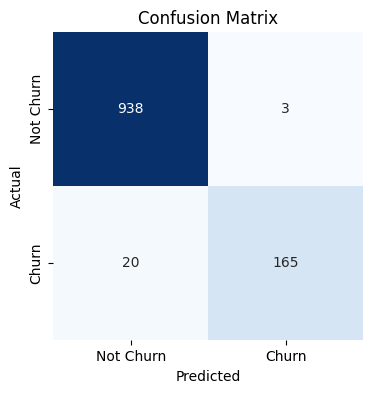

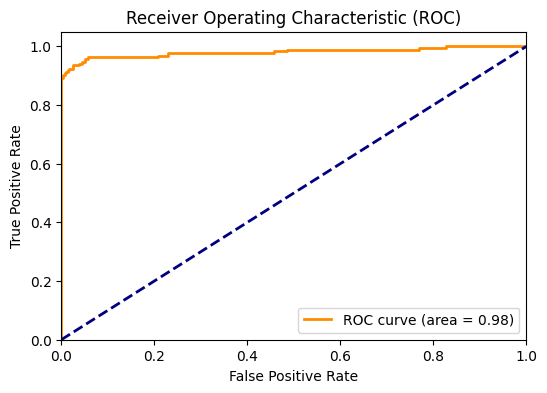

In [30]:
# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Not Churn', 'Churn'], 
            yticklabels=['Not Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print()
print()

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, model_xgb.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()